# Number of crime by month

#To Start Pyspark#
Note: before starting Pyspark in terminal, need to "source .bash_profile" to let the hadoop 2.8 path added!

##https://medium.com/@GalarnykMichael/install-spark-on-mac-pyspark-453f395f240b 
-two ways to initiate Pyspark:
1. type 'Pyspark' in terminal, it will automatically open up Jupyter Notebook, then run "from pyspark import SparkContext" in Jupyter notebook. Note before type and run 'Pyspark' need to 'source .bash_profile'
2. open up Jupyter notebook from terminal in the normal way, then run "import findspark", and then "findspark.init()" and then "from pyspark import SparkContext" both way will initiate Pyspark substance in Jupyter notebook. Use sc.stop() to stop the Pyspark substance

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re

In [4]:
#The new spark 2.0 have all contexts from SparkContext to sqlContext integrated with spark session, that's already initiated when called pyspark
#only need to get the initiated context by 'sc=SparkContext.getOrCreate()'
#from pyspark.sql.functions import *
#from pyspark.context import SparkContext 
#from pyspark.sql import SQLContext


#sc = SparkContext(appName='HW4 App')

In [1]:
sc = SparkContext.getOrCreate()

In [71]:
#use when done with current pyspark context
sc.stop()

In [2]:
sqlContext = SQLContext(sc)
#sc.setLogLevel("ERROR")

In [3]:
crime = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('Crimes_-_2001_to_present.csv')
crime.show(10)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10078659|   HY267429|05/19/2015 11:57:...|     010XX E 79TH ST|143A|   WEAPONS VIOLATION|UNLAWFUL POSS OF ...|             

In [60]:
#create column month, day, year from column Date 
#substring(Column str, int pos, int len)
crime=crime.withColumn("month", substring(col("Date"),1,2))
crime=crime.withColumn("day", substring(col("Date"),4,2))

In [61]:
crime.take(5)

[Row(ID=10078659, Case Number='HY267429', Date='05/19/2015 11:57:00 PM', Block='010XX E 79TH ST', IUCR='143A', Primary Type='WEAPONS VIOLATION', Description='UNLAWFUL POSS OF HANDGUN', Location Description='STREET', Arrest=True, Domestic=False, Beat=624, District=6, Ward=8, Community Area='44', FBI Code='15', X Coordinate=1184626, Y Coordinate=1852799, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=41.751242944, Longitude=-87.599004724, Location='(41.751242944, -87.599004724)', month='05', day='19'),
 Row(ID=10078598, Case Number='HY267408', Date='05/19/2015 11:50:00 PM', Block='067XX N SHERIDAN RD', IUCR='3731', Primary Type='INTERFERENCE WITH PUBLIC OFFICER', Description='OBSTRUCTING IDENTIFICATION', Location Description='STREET', Arrest=True, Domestic=False, Beat=2432, District=24, Ward=49, Community Area='1', FBI Code='24', X Coordinate=1167071, Y Coordinate=1944859, Year=2015, Updated On='05/26/2015 12:42:06 PM', Latitude=42.004255918, Longitude=-87.660691083, Location='

In [62]:
print(crime.printSchema())


root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)

None


In [65]:
#count number of crime by month:
monthly_count=crime.select("month","Case Number").groupBy("month").count().sort("month")


In [66]:
monthly_count.take(5)

[Row(month='01', count=463497),
 Row(month='02', count=407957),
 Row(month='03', count=492905),
 Row(month='04', count=494231),
 Row(month='05', count=521509)]

In [67]:
#convert from spark data frame to pandas data frame
pd_crime=monthly_count.toPandas()

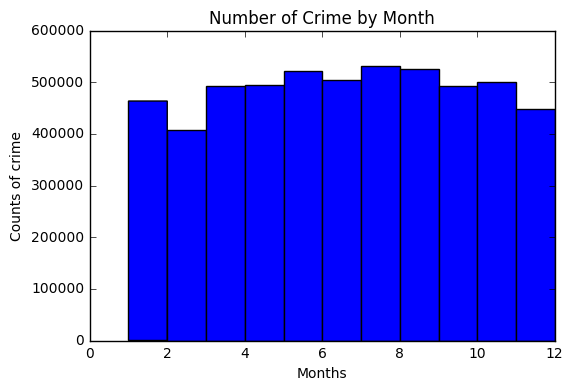

In [70]:
#plot pandas dataframe histogram 
plt.hist([1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1], bins=[1,2,3,4,5,6,7,8,9,10,11,12],weights=pd_crime['count'].tolist());
plt.title("Number of Crime by Month")
plt.xlabel("Months")
plt.ylabel("Counts of crime")
plt.show()